<img src="./logo_UNSAM.jpg" align="right" width="300" /> 

# Análisis y Procesamiento de Señales

## Trabajo Práctico Nº3 - Análisis de Fourier: FFT, desparramo, interpolación y ventaneo

#### Sofía Gervasi

## Introducción

En este trabajo se aborda el estudio del desparramo espectral, un efecto que surge cuando la frecuencia de una señal senoidal no coincide exactamente con un valor entero de la resolució espectral. Se analizará cómo esto afecta la distribución espectral de potencia y se empleará la técnica de zero padding para obtener una mejor visualización del espectro. 

La Densidad Espectral de Potencia (PSD) es una función que describe la distribución de la potencia de una señal en el dominio de la frecuencia. Para una señal discreta $x[n]$, la PSD se define como: $$ PSD =|X[k]|^2 $$

Donde $X[k]$ representa la DFT de la señal y $k$ es el índice de frecuencia discreto correspondiente a la frecuencia $
f_k = k \cdot \Delta f = k \cdot \frac{f_S}{N} $

La identidad de Parseval establece una relación entre la energía de una señal en el dominio temporal y su representación en el dominio frecuencial. Para una señal discreta de N muestras, esta identidad se expresa como:
$$ \sum_{n=0}^{N-1} |x[n]|^2 = \frac{1}{N} \sum_{k=0}^{N-1} |X[k]|^2 $$

Esta relación permite verificar la conservación de la energía/potencia entre ambos dominios. En términos de potencia normalizada, para una señal con varianza unitaria, la suma de todos los componentes de la PSD debe ser igual a la unidad. 

El zero padding es una técnica que consiste en agregar ceros al final de una secuencia de datos antes de aplicar la DFT. Esta operación no añade información nueva a la señal, pero modifica la resolución espectral  proporcionando una visualización más detallada del espectro. 




## Análisis y Desarrollo

I. Se generará una señal sinusoidal de frecuencia $f_k = k_0 \cdot \Delta f $ y potencia normalizada. Se irá variando el valor de $k_0$ a $\frac{N}{4}$, $\frac{N}{4} + 0.25$ y $\frac{N}{4} + 0.5$

Potencia de la Señal con k0=N/4: 1.0
Potencia de la Señal con k0=N/4 + 0.25: 1.0
Potencia de la Señal con k0=N/4 + 0.5: 1.0


(0.0, 500.0)

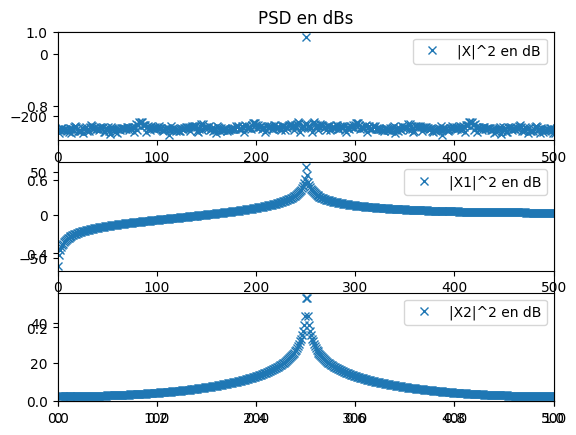

In [11]:
# -*- coding: utf-8 -*-
"""
Created on Fri Sep 12 17:21:58 2025

@author: Sofía
"""

import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft

fs = 1000 # frecuencia de muestreo (Hz)
N = 1000  # cantidad de muestras  
ts = 1/fs # tiempo de muestreo (s)
df = fs/N # resolución espectral (Hz)
A=np.sqrt(2) #amplitud normalizada (V)
k0=N/4
k1=(N/4)+0.25
k2=(N/4)+0.5

#%% Genero las señales

tt = np.linspace(0, (N-1)*ts, N).flatten()
xx= A*np.sin(2*np.pi*tt*k0*df) 

x1=A*np.sin(2*np.pi*tt*k1*df) 

x2=A*np.sin(2*np.pi*tt*k2*df) 

#Verifico que la potencia de la señal este normalizada
var=np.var(xx)
print(f'Potencia de la Señal con k0=N/4: {var:3.1f}')
var1=np.var(x1)
print(f'Potencia de la Señal con k0=N/4 + 0.25: {var1:3.1f}')
var2=np.var(x2)
print(f'Potencia de la Señal con k0=N/4 + 0.5: {var2:3.1f}')

# Calculo la DEP
XX=fft(xx)
DP=(np.abs(XX))**2

X1=fft(x1)
DP1=(np.abs(X1))**2

X2=fft(x2)
DP2=(np.abs(X2))**2

#Grafico la DEP en dBs
ff = np.linspace(0, (N-1)*df, N).flatten()

plt.title('PSD en dBs')  
plt.subplot(3,1,1)
plt.plot(ff,10*np.log10(DP),'x',label='|X|^2 en dB')
plt.legend()
plt.xlim((0, N/2)) 
plt.subplot(3,1,2)
plt.plot(ff,10*np.log10(DP1),'x',label='|X1|^2 en dB')
plt.legend()
plt.xlim((0, N/2)) 
plt.subplot(3,1,3)
plt.plot(ff,10*np.log10(DP2),'x',label='|X2|^2 en dB')
plt.legend()
plt.xlim((0, N/2)) 

II. Se verificará la potencia unitaria de cada PSD, utilizando la identidad de Parseval.

In [12]:
P=(1/N)*np.sum(DP)
P1=(1/N)*np.sum(DP1)
P2=(1/N)*np.sum(DP2)

print(f'Potencia Unitaria de XX: {P:3.1f}')
print(f'Potencia Unitaria de X1: {P1:3.1f}')
print(f'Potencia Unitaria de X2: {P2:3.1f}')

Potencia Unitaria de XX: 1000.0
Potencia Unitaria de X1: 999.0
Potencia Unitaria de X2: 1000.0


III. Se repetirá la experiencia del ejercicio I. utilizando la técnica de zero padding. 

(0.0, 500.0)

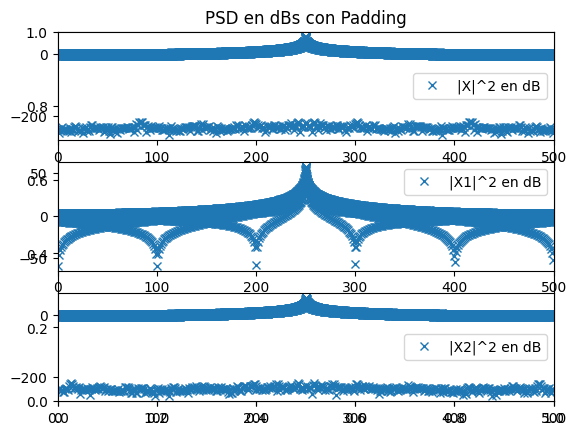

In [13]:
M=10*N

padding=np.zeros(M) 
padding[:N]=xx

padding1=np.zeros(M) 
padding1[:N]=x1

padding2=np.zeros(M) 
padding2[:N]=x2


XX=fft(padding)
DP=(np.abs(XX))**2

X1=fft(padding1)
DP1=(np.abs(X1))**2

X2=fft(padding2)
DP2=(np.abs(X2))**2


df_p=fs/M
ff_p = np.linspace(0,(M-1)*df_p, M).flatten()

plt.title('PSD en dBs con Padding')  
plt.subplot(3,1,1)
plt.plot(ff_p,10*np.log10(DP),'x',label='|X|^2 en dB')
plt.legend()
plt.xlim((0, N/2)) 
plt.subplot(3,1,2)
plt.plot(ff_p,10*np.log10(DP1),'x',label='|X1|^2 en dB')
plt.legend()
plt.xlim((0, N/2)) 
plt.subplot(3,1,3)
plt.plot(ff_p,10*np.log10(DP2),'x',label='|X2|^2 en dB')
plt.legend()
plt.xlim((0, N/2)) 

## Conclusiones

Cuando analizamos una señal durante un tiempo $T =\frac{N}{fs}$, estamos implícitamente multiplicando la señal por una ventana rectangular. La transformada de Fourier de una ventana rectangular de N muestras es una función sinc que presenta un lóbulo principal de ancho $\frac{2}{\omega t}$ y múltiples lóbulos secundarios decrecientes. Cuando la frecuencia f₀ de la señal coincide exactamente con un multiplo de la resolución espectral, los ceros de la función sinc coinciden con los demás $\Delta f$ de la grilla, resultando en un espectro limpio. Sin embargo, cuando f₀ no coincide exactamente con ninguna frecuencia de la grilla, la convolución distribuye la energía entre múltiples bins, creando el desparramo espectral observado para el caso de $k_0 = \frac{N}{4} + 0.25$ y $k_0 = \frac{N}{4} + 0.5$.

En el caso donde $k_0 =\frac{N}{4}$, la frecuencia de la señal senoidal coincide exactamente con un multiplo de la $\Delta f$ , por lo que toda la energía se concentra en un solo bin y en el gráfico de la PSD se observa un pico localizado. En este caso no se presenta desparramo espectral porque los ceros de la función sinc caen en los $k \Delta f$ de la grilla. 

Para las señales con $k_0 = \frac{N}{4} + 0.25$ y $k_0 = \frac{N}{4} + 0.5$, la frecuencia no coincide con ningun $k \Delta f$T. Como queda ubicada entre dos bins, la energía se distribuye entre las frecuencias adyacentes, lo que resulta en desparramo espectral. 

Sin embargo, mediante la identidad de Parseval se confirma que en todos los casos la suma de la PSD es igual a la unidad, demostrando que la energía total de la señal se conserva.

Finalmente, la aplicación de la técnica de zero padding produce una mejora aparente en la resolución frecuencial, reduciendo el espaciado entre frecuencias de $\Delta f$, lo que permite visualizar mejor el espectro. Cuando la señal está "desintonizada", el zero padding evidencia como se distrubuye la energía alrededor de la frecuencia real de la señal y revela como la función sinc interpola. 